# Training Models

In this section, I will train models to predict house prices. To stretch out firstly I tried simple OLS Regression both applying a formula and using libraries (statmodels and seaborn).

After that, I tried every model as hand-tuned or with grid search I reported all results after every model. You can see models and frameworks/libraries in the table below.

| Model                                            | Library - Framework |
| :----------------------------------------------- | :-----------------: |
| Multiple Regression                              |    scikit-learn    |
| Polinomial Regression                            |    scikit-learn    |
| Lasso Regression (l1 regularization)             |    scikit-learn    |
| Ridge Regression (l2 regularization)             |    scikit-learn    |
| ElasticNet Regression (l1 and l2 regularization) |    scikit-learn    |
| Support Vector Regression                        |    scikit-learn    |
| Decision Tree                                    |    scikit-learn    |
| Random Forest                                    |    scikit-learn    |
| Ada Boost                                        |    scikit-learn    |
| Gradient Boosting                                |    scikit-learn    |
| eXtreme Gradient Boosting                        |       XGBoost       |
| Neural Network                                   |     TensorFlow     |



### Notebook Structure

**Load Prepare Data**
* **Data prepation - Trains Test Split and Feature Scaling**

**Simple OLS**
* **Custom Calculation**
*  **Calculation with Libraries**

**Regression Models**
* **Multiple Linear Regression Models**
* **Polynomial Regression Model**
* **Grid Search on Linear Regression Models with Regularization**
  *  **Lasso**
  * **Ridge**
  * **ElasticNet**

**Support Vector Regression**
**Tree Based Models**
* **Decision Tree Regressor**
* **Random Forest Regressor**
* **AdaBoost Regressor**
* **Gradient Boosting Regressor**
* **eXtreme Gradient Boosting**

**Neural Network**

**Deploying Models**


### Load & Prepare Data

In models, data will be used as both scaled and unscaled. To scale data I used a standard scaler which calculates every feature Z score with training data set statistics.

In [1]:
# Import lib.
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import (residual_plots, html_table,
                       reg_score_table, residual_plot)

pd.set_option('float_format', '{:f}'.format)

processed_data_dir = Path('../data/processed/')
file_name = 'train.csv'
file_path = processed_data_dir / file_name
models_trained_dir = Path('../models/trained/')

In [2]:
df = pd.read_csv(file_path)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,259,260,261,262,263,264,265,266,267,268
0,65.000000,8450,7,5,2003,2003,196.000000,706,0,150,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,80.000000,9600,6,8,1976,1976,0.000000,978,0,284,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,68.000000,11250,7,5,2001,2002,162.000000,486,0,434,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,60.000000,9550,7,5,1915,1970,0.000000,216,0,540,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,84.000000,14260,8,5,2000,2000,350.000000,655,0,490,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [3]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)
print(X_train_scaled.shape)
print(X_train.shape)
print(X_test_scaled.shape)
print(X_test.shape)

(1153, 304)
(1153, 304)
(289, 304)
(289, 304)


### Simple OLS
In this section, I tried Ordinary Least Square Regression with a formula and demonstrate results in different ways.

In [6]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
cont_cols = X.columns[:list(X.columns).index('YrSold') + 1]

##### Custom Calculation

In [7]:
x_ols = df['GrLivArea'].values
y_ols = df['SalePrice'].values
# np.polyfit(x,y,deg=1)
x_mean = x_ols.mean()
y_mean = y_ols.mean()
x_me = x_ols - x_mean
y_me = y_ols - y_mean
x_sme = np.sum(x_me ** 2)
m = np.sum(x_me * y_me) / x_sme
b = y_mean - m * x_mean
print(f'y_hat_i = {np.round(m, decimals=3)}*x_i + {np.round(b, decimals=3)}')

y_hat_i = 97.269*x_i + 31670.473


In [8]:
y_pred = x_ols * m + b
R2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum(y_me ** 2))

print(
    f'GrLivArea describe {np.round(R2, decimals=4) * 100}% of SalePrice\'s varience.')

GrLivArea describe 47.4% of SalePrice's varience.


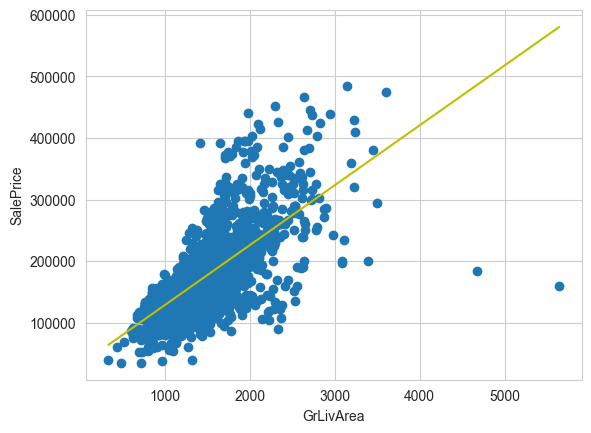

In [9]:
fig, ax = plt.subplots()
line_x = np.array([np.min(x_ols), np.max(x_ols)])
line_y = line_x * m + b
ax.plot(line_x, line_y, color='y')
ax.scatter(x_ols, y_ols)
ax.set_ylabel('SalePrice')
ax.set_xlabel('GrLivArea')
plt.show()

##### Calculation with Libraries

In [10]:
import statsmodels.api as sm

x_ols = sm.add_constant(x_ols)
results = sm.OLS(y_ols, x_ols).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1297.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          4.12e-203
Time:                        01:29:20   Log-Likelihood:                -17704.
No. Observations:                1442   AIC:                         3.541e+04
Df Residuals:                    1440   BIC:                         3.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.167e+04   4285.965      7.389      0.0

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

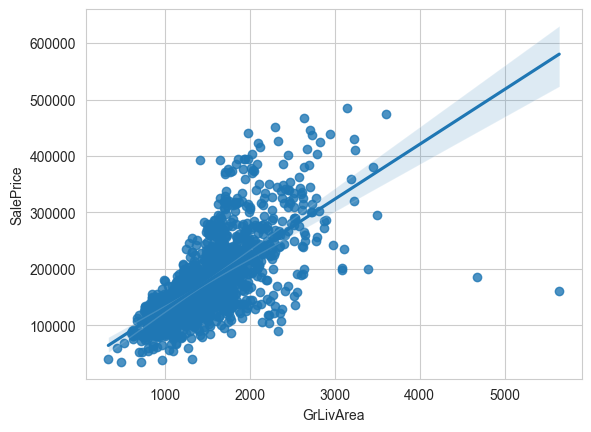

In [11]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df)

## Training  Models

### Regression Models
* **Multiple Linear Regression Models**
* **Polynomial Regression Model**
* **Grid Search on Linear Regression Models with Regularization**
  *  **Lasso**
  * **Ridge**
  * **ElasticNet**

#### Multiple Linear Regression Models

Scaled data can cause little differences in training, in this section I demonstrated that. You can see below in the test set we get inferior performance but it is not a problem it can be solved easily with regularization etc. In many regression models, I used scaled data.

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

D:\Desktop\ML_projects\HousePricesKaggle\src\utils.py:22: RuntimeWarning: invalid value encountered in log
  np.square(np.log(y_pred + 1) - np.log(y_true + 1))))
D:\Desktop\ML_projects\HousePricesKaggle\src\utils.py:22: RuntimeWarning: invalid value encountered in log
  np.square(np.log(y_pred + 1) - np.log(y_true + 1))))


,Train Regression,Test Regression,Train Regression Scaled,Test Regression Scaled
R2,0.940551,0.851252,0.940551,-13802370558656051200.000000
MAE,11964.188977,16853.092660,11965.060553,23044219046293.402344
MSE,311424730.371366,696571233.702560,311426488.079284,64635214759035146208112803840.000000
RMSE,17647.230105,26392.635975,17647.279906,254234566412663.781250
RMSLE,0.102235,0.157656,0.102219,2.341727


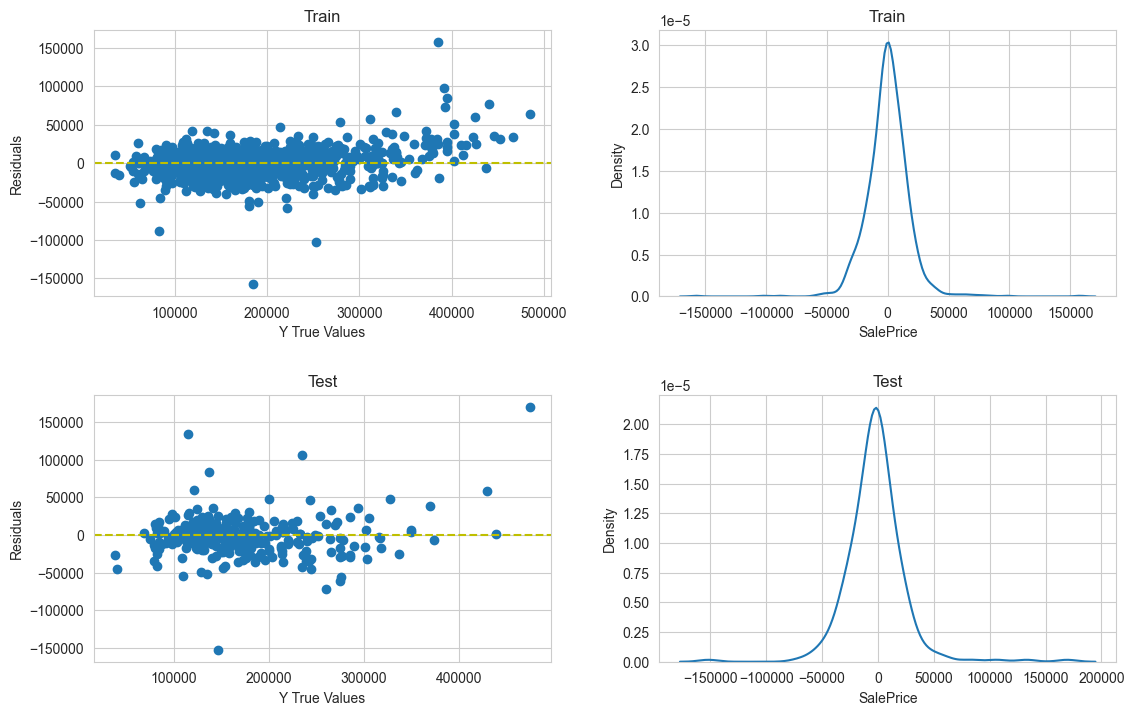

In [13]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_scaled = LinearRegression()
reg_scaled.fit(X_train_scaled, y_train)

reg_scores = reg_score_table(reg, X_train, X_test, y_train, y_test)
reg_scores.columns += ' Regression'
reg_scaled_scores = reg_score_table(reg_scaled, X_train_scaled, X_test_scaled,
                                    y_train, y_test)
reg_scaled_scores.columns += ' Regression Scaled'

scores = pd.concat([reg_scores, reg_scaled_scores], axis=1)
html_table(scores)
residual_plots(reg, X_train, X_test, y_train, y_test)

#### Polynomial Regression Model

**Description**
To see if polynomial regression is suitable for the task I try it too with the lowest degree because the data set already has lots of features.

**Results**
As you can see model performance on the training set there is no error because the data set already has lots of features with interaction terms it goes so much(46665), it gives lots of information and causes overfitting. You can see poor performance on the test set model has a high variance problem. So there is no use in trying higher degrees we can keep looking for better models on different algorithms.


In [15]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2)
polynomial_converter.fit(X)
X_poly = polynomial_converter.transform(X)
print('Dataset features shape is: ', X_poly.shape)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=43)

sc_poly = StandardScaler()
sc_poly.fit(X_train_poly)
X_train_poly_scaled = sc_poly.transform(X_train_poly)
X_test_poly_scaled = sc_poly.transform(X_test_poly)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_scaled, y_train_poly)

poly_reg_scores = reg_score_table(poly_reg, X_train_poly_scaled,
                                  X_test_poly_scaled,
                                  y_train_poly,
                                  y_test_poly)
poly_reg_scores.columns += ' Polynomial Regression'
html_table(poly_reg_scores)

Dataset features shape is:  (1442, 46665)


D:\Desktop\ML_projects\HousePricesKaggle\src\utils.py:22: RuntimeWarning: invalid value encountered in log
  np.square(np.log(y_pred + 1) - np.log(y_true + 1))))


,Train Polynomial Regression,Test Polynomial Regression
R2,1.000000,0.546429
MAE,0.000000,24949.286428
MSE,0.000000,2564744078.439766
RMSE,0.000000,50643.302405
RMSLE,0.000000,0.217845


#### Grid Search on Linear Regression Models with Regularization

In [16]:
# Helper function to automate traning evaluating steps with grid search
def fit_eval_grid_gen(X_train, X_test, y_train, y_test, **kwargs):
    '''Helper function initializer for different data sets.'''

    def fit_eval_grid(model, param_grid, title):
        '''Helper function to automate training evaluation steps with grid search
        Args:
            model (sklearn estimator): Model to train and evaluate.
            param_grid (dict): Grid search params to find best model.
            title (string): Model title to demonstrating purpose.

        Returns:
            model(sklearn grid estimator): Model to train and evaluate.
            scores (pandas.DataFrame): Regression scores for the trained model.

        '''
        grid = GridSearchCV(model, param_grid, cv=5,
                            n_jobs=-1, verbose=3, **kwargs)
        grid.fit(X_train, y_train)
        print('\n\rBest params are: ', grid.best_params_, '\n')
        scores = reg_score_table(grid, X_train, X_test, y_train,
                                 y_test)
        scores.columns += f' {title}'
        html_table(scores)
        return grid, scores

    return fit_eval_grid

In [17]:
fit_eval_grid_reg = fit_eval_grid_gen(X_train_scaled, X_test_scaled, y_train,
                                      y_test,
                                      **{'scoring': 'neg_mean_squared_error'})

##### Lasso

**Description**
Regression with l1 regularization and grid search with different lambda values.

**Results**
Performance on training set pretty well and you can see from the below table test set result there is little variance.

In [18]:
lasso_model = Lasso(max_iter=int(1e+4))
lasso_param_grid = {'alpha': np.logspace(-3, 2, 10)}
lasso_grid, lasso_scores = fit_eval_grid_reg(lasso_model, lasso_param_grid,
                                             'Lasso')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best params are:  {'alpha': 100.0} 



,Train Lasso,Test Lasso
R2,0.938261,0.886924
MAE,12161.050997,14843.647566
MSE,323425610.665414,529524008.165851
RMSE,17984.037663,23011.388662
RMSLE,0.102753,0.132549


##### Ridge

**Description**
Regression with l2 regularization and grid search with different lambda values.

**Results**
Performance on training set pretty well and you can see from the below table test set result there is little variance just like lasso model.

In [19]:
ridge_model = Ridge(max_iter=int(1e+4))
ridge_param_grid = {'alpha': np.logspace(-3, 2, 10)}
ridge_grid, ridge_scores = fit_eval_grid_reg(ridge_model, ridge_param_grid,
                                             'Ridge')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best params are:  {'alpha': 100.0} 



,Train Ridge,Test Ridge
R2,0.935808,0.887490
MAE,12550.769691,14888.542178
MSE,336275187.525150,526874799.133160
RMSE,18337.807599,22953.753487
RMSLE,0.102743,0.133304


##### ElasticNet

**Description**
Regression with l1+l2 regularization and grid search with different lambda and regularization ratio values.

**Results**
Performance on training set pretty well and you can see from the below table test set result there is little variance just like lasso and ridge model.

In [20]:
elastic_model = ElasticNet(max_iter=int(1e+3))
elastic_param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100],
                      'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]}
elastic_grid, elastic_scores = fit_eval_grid_reg(elastic_model,
                                                 elastic_param_grid,
                                                 'Elastic')

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best params are:  {'alpha': 50, 'l1_ratio': 0.99} 



,Train Elastic,Test Elastic
R2,0.915761,0.883771
MAE,14107.324278,15103.082379
MSE,441291202.406771,544291083.688188
RMSE,21006.932246,23330.046800
RMSLE,0.109927,0.132561


### Support Vector Regression

**Description**
Regression Support Vector Machine and grid search with different hyperparameters.

**Results**
Both training and test set performance is very poor. I can conclude that SVR is not suitable for our task and data set.

In [22]:
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4],
              'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

svr = SVR()
svr_grid = GridSearchCV(svr, param_grid=param_grid, n_jobs=-1, verbose=3)
svr_grid.fit(X_train_scaled, y_train)

print('\n\rBest params are: ', svr_grid.best_params_, '\n')
svr_scores = reg_score_table(svr_grid, X_train_scaled, X_test_scaled, y_train,
                             y_test)
svr_scores.columns += ' SVR'
html_table(svr_scores)

,Train SVR,Test SVR
R2,0.270208,0.293564
MAE,41726.259136,39896.220577
MSE,3823061429.727689,3308174465.590054
RMSE,61830.909986,57516.732049
RMSLE,0.308028,0.306684


### Tree Based Models
* **Decision Tree Regressor**
* **Random Forest Regressor**
* **AdaBoost Regressor**
* **Gradient Boosting Regressor**
* **eXtreme Gradient Boosting**

In [23]:
fit_eval_grid_tree = fit_eval_grid_gen(X_train, X_test, y_train, y_test)

#### Decision Tree Regressor

**Description**
Decision Tree Regressor and grid search with different hyperparameters.

**Results**
Training set performance is not good as regression models and also test set performance is very low compared with training set performance. Even though I searched for lots of combinations of hyperparameters best model still struggle with high variance problem.

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [5, 10, 30, 50, 100, 150, 300],
    'min_samples_split': [3, 5, 10],
    'min_impurity_decrease': np.logspace(-2, 0, 10)
}
tree_grid, tree_scores = fit_eval_grid_tree(tree_model, param_grid,
                                            'Decision Tree')

Fitting 5 folds for each of 840 candidates, totalling 4200 fits

Best params are:  {'criterion': 'absolute_error', 'max_depth': 5, 'min_impurity_decrease': 1.0, 'min_samples_split': 10} 



,Train Decision Tree,Test Decision Tree
R2,0.849019,0.717699
MAE,19306.564614,24569.233564
MSE,790923374.088465,1321987229.902249
RMSE,28123.359936,36359.142315
RMSLE,0.167368,0.198396


#### Random Forest Regressor

**Description**
Random Forest Regressor and grid search with different hyperparameters.

**Results**
Performance on the training set was very well (almost no error) but you can see from the below table test set result there is variance problem a bit the performance was very close to regression models but because it well fitted on the training set variance became bigger. As a result better training set performance didn't improve performance on the test set compared with regression models.

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [5, 50, 150, 300],
    'min_impurity_decrease': np.logspace(-2, 0, 4),
    'n_estimators': [50, 100, 200]
}
rfr_grid, RFR_scores = fit_eval_grid_tree(rfr_model, param_grid,
                                          'Random Forest')

Fitting 5 folds for each of 192 candidates, totalling 960 fits

Best params are:  {'criterion': 'squared_error', 'max_depth': 300, 'min_impurity_decrease': 1.0, 'n_estimators': 200} 



,Train Random Forest,Test Random Forest
R2,0.982063,0.864336
MAE,6245.463422,16378.079374
MSE,93966536.642615,635300656.327633
RMSE,9693.633820,25205.171222
RMSLE,0.058092,0.147815


#### AdaBoost Regressor

**Description**
AdaBoost on Random Forest Regressor and grid search with different hyperparameters.

**Results**
Both training and test set performance is not good as regression models and random forest. But we can't say it is a bad model.

In [26]:
from sklearn.ensemble import AdaBoostRegressor

abr_model = AdaBoostRegressor()
param_grid = {
    'loss': ['linear', 'square', 'exponential'],
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.1, 1., 10.],
}
abr_grid, abr_scores = fit_eval_grid_tree(abr_model, param_grid,
                                          'AdaBoost')

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best params are:  {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 1000} 



,Train AdaBoost,Test AdaBoost
R2,0.892127,0.810604
MAE,19080.583916,21721.918108
MSE,565100802.194229,886924139.055193
RMSE,23771.848944,29781.271616
RMSLE,0.165199,0.192880


#### Gradient Boosting Regressor

**Description**
Gradient Boosting on Random Forest Regressor and grid search with different hyperparameters.

**Results**
Performance on the training set was very well (almost no error) but you can see from the below table test set result there is variance problem a bit the performance was very close to regression models but because it well fitted on the training set variance became bigger. As a result better training set performance didn't improve performance on the test set compared with regression models. But it is one of the best models considered for test set performance for now.

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_impurity_decrease': [0.21544],
}
gbr_grid, gbr_scores = fit_eval_grid_tree(gbr_model, param_grid,
                                          'Gradient Boosting')

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best params are:  {'max_depth': 3, 'min_impurity_decrease': 0.21544, 'n_estimators': 200} 



,Train Gradient Boosting,Test Gradient Boosting
R2,0.980863,0.878469
MAE,7619.646893,14810.326059
MSE,100251266.378651,569118586.082462
RMSE,10012.555437,23856.206448
RMSLE,0.064675,0.133867


#### eXtreme Gradient Boosting

**Description**
eXtreme Gradient Boosting on Random Forest Regressor and grid search with different hyperparameters.

**Results**
Its performance is very similar to the random forest regressor.

In [28]:
import xgboost as xgb

xgbr_model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
}
xgbr_grid, xgbr_scores = fit_eval_grid_tree(xgbr_model, param_grid,
                                            'eXtreme Gradient Boosting')

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best params are:  {'max_depth': 3, 'n_estimators': 300} 



,Train eXtreme Gradient Boosting,Test eXtreme Gradient Boosting
R2,0.997842,0.866958
MAE,2493.717253,15624.645802
MSE,11303959.187848,623024752.327738
RMSE,3362.136105,24960.463784
RMSLE,0.022273,0.138592


### Neural Network

**Description**
I tried simple neural network model with hand tuned hyperparameters.

**Results**
Its performance is very similar to regression models with regularization.

In [29]:
import tensorflow as tf

In [30]:
def nodereg(nodes):
    return tf.keras.layers.Dense(nodes,
                                 kernel_regularizer=tf.keras.regularizers.L1L2(
                                     l1=0.99), )


def ann_model_init():
    inputs = tf.keras.Input(shape=(X_train_scaled.shape[1]))

    x1 = nodereg(10)(inputs)
    x = nodereg(20)(x1)
    x = nodereg(20)(x)
    x = nodereg(30)(x)
    x = nodereg(30)(x)
    x = nodereg(20)(x)
    x = nodereg(20)(x)
    x2 = nodereg(10)(x)
    x = tf.concat([x1, x2], axis=1)
    outputs = nodereg(1)(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)


ann_model = ann_model_init()
ann_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 304)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 10)           3050        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           220         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 20)           420         ['dense_1[0][0]']                
                                                                                              

In [31]:
@tf.function
def r2_score(y_true, y_pred):
    numerator = tf.reduce_sum(tf.square(y_true - y_pred))
    denominator = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (numerator / denominator)


optimizer = tf.keras.optimizers.Adam(0.01)
metric = r2_score
ann_model.compile(optimizer=optimizer,
                  metrics=[metric],
                  loss='mse')


def scheduler(epoch, lr):
    if 0 < epoch and epoch % 70 == 0:
        return lr / 2
    else:
        return lr


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = ann_model.fit(x=X_train_scaled, y=y_train,
                        epochs=100,
                        validation_data=(X_test_scaled, y_test),
                        batch_size=X_train.shape[0],
                        verbose=0,
                        callbacks=[callback, ],
                        shuffle=True
                        )

In [32]:
ann_scores = reg_score_table(ann_model, X_train_scaled, X_test_scaled, y_train,
                             y_test)
ann_scores.columns += ' ANN'
ann_scores

10/10 [==============================] - 0s 2ms/step


,Train ANN,Test ANN
R2,0.932233,0.874988
MAE,13177.965049,16079.370945
MSE,355003237.269589,585419850.640007
RMSE,18841.529589,24195.451032
RMSLE,0.109179,0.144718


### Deploying Model

In this section, I saved all models after retraining on the full data set because it will be used for practical purposes so we would like to get all information we can possibly get. I also saved feature transformers for transforming new data.

**Performance Summary**
As a result, I demonstrated below table all of the model scores. There are lots of good models but considering with test set performance and because of simplicity, I would use Ridge regression for future predictions.

In [33]:
all_scores = pd.concat((reg_scores, poly_reg_scores, lasso_scores, ridge_scores,
                        elastic_scores, svr_scores, tree_scores, RFR_scores,
                        abr_scores, gbr_scores, xgbr_scores, ann_scores),
                       axis=1)
html_table(all_scores.T)

,R2,MAE,MSE,RMSE,RMSLE
Train Regression,0.940551,11964.188977,311424730.371366,17647.230105,0.102235
Test Regression,0.851252,16853.092660,696571233.702560,26392.635975,0.157656
Train Polynomial Regression,1.000000,0.000000,0.000000,0.000000,0.000000
Test Polynomial Regression,0.546429,24949.286428,2564744078.439766,50643.302405,0.217845
Train Lasso,0.938261,12161.050997,323425610.665414,17984.037663,0.102753
Test Lasso,0.886924,14843.647566,529524008.165851,23011.388662,0.132549
Train Ridge,0.935808,12550.769691,336275187.525150,18337.807599,0.102743
Test Ridge,0.887490,14888.542178,526874799.133160,22953.753487,0.133304
Train Elastic,0.915761,14107.324278,441291202.406771,21006.932246,0.109927
Test Elastic,0.883771,15103.082379,544291083.688188,23330.046800,0.132561


In [34]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)
polynomial_converter = PolynomialFeatures(degree=2)
X_scaled_poly = polynomial_converter.fit_transform(X_scaled)

In [35]:
from joblib import dump


def train_deploy(model_class, X, model_name, **kwargs):
    model = model_class(**kwargs)
    model.fit(X, y)
    model_path = models_trained_dir / f'{model_name}.joblib'
    dump(model, model_path)
    return model

In [36]:
reg_final = train_deploy(LinearRegression, X, '0.1-linearregression')
polyreg_final = train_deploy(LinearRegression, X_scaled_poly,
                             '0.2-polynomialregression')
lasso_final = train_deploy(Lasso, X_scaled, '0.3-lasso',
                           **lasso_grid.best_params_)
ridge_final = train_deploy(Ridge, X_scaled, '0.4-ridge',
                           **ridge_grid.best_params_)
elastic_final = train_deploy(ElasticNet, X_scaled, '0.5-elasticnet',
                             **elastic_grid.best_params_)
svr_final = train_deploy(SVR, X_scaled, '0.6-supportvector',
                         **svr_grid.best_params_)
tree_final = train_deploy(DecisionTreeRegressor, X, '0.7-decisiontree',
                          **tree_grid.best_params_)
rfr_final = train_deploy(RandomForestRegressor, X, '0.8-randomforest',
                         **rfr_grid.best_params_)
abr_final = train_deploy(AdaBoostRegressor, X, '0.8-adaboost',
                         **abr_grid.best_params_)
gbr_final = train_deploy(GradientBoostingRegressor, X, '0.9-gradientboosting',
                         **gbr_grid.best_params_)
xgbr_final = train_deploy(xgb.XGBRegressor, X, '0.10-extremegradientboosting',
                          **xgbr_grid.best_params_)

In [37]:
ann_final = ann_model_init()
ann_final.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics=[metric],
                  loss='mse')
ann_final.fit(x=X_scaled, y=y,
              epochs=100,
              batch_size=X_scaled.shape[0],
              verbose=0,
              callbacks=[callback, ],
              shuffle=True)
ann_final.save(models_trained_dir / f'0.11-neuralnet.h5')

In [40]:
dump(final_scaler, '../models/featurebuild/' + '0.2-standardscaler.joblib')
dump(polynomial_converter,
     '../models/featurebuild/' + '0.3-polynomialconverter.joblib')

['../models/featurebuild/0.3-polynomialconverter.joblib']

### Performance on one of the Final Modals

You can see xgbr residuals distribution, residuals are normally distributed.

,Train
R2,0.996305
MAE,3262.776168
MSE,18973363.600874
RMSE,4355.842467
RMSLE,0.030001


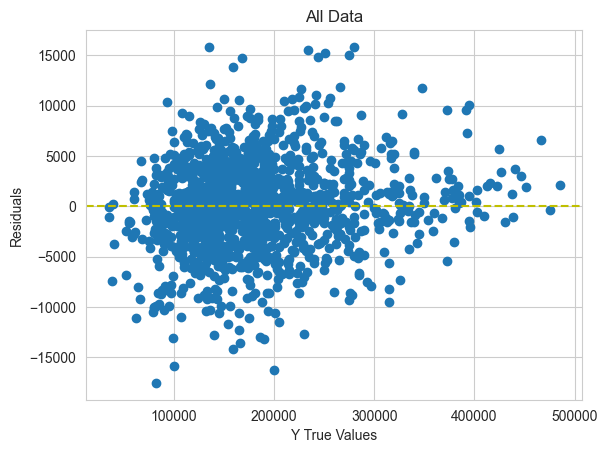

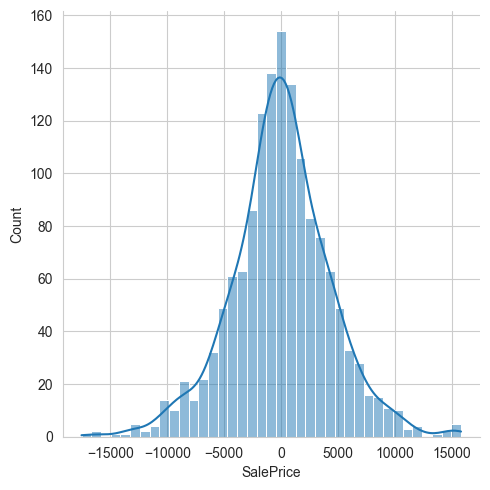

In [38]:
final_scores = reg_score_table(xgbr_final, X, X, y, y).drop('Test', axis=1)
html_table(final_scores)
residuals = y - xgbr_final.predict(X)
residual_plot(y, residuals, title='All Data')
sns.displot(residuals, kde=True)
plt.show()